In [1]:
import torch
import numpy as np
from sfgnets.vertex_activity_net.datasets import TransformerDataset
from sfgnets.vertex_activity_net.models import VATransformer
import polars as pol
import matplotlib.pyplot as plt

In [2]:
version = 13
metrics = pol.read_csv(f"/scratch4/maubin/results/vertex_activity_log/version_{version}/metrics.csv")
loss_legends = ["Total", "Vertex position", "Kinematic parameters", "Particle identification", "Keep iterating"]
loss_names = ["val_loss",]+[ "val_loss"+str(i) for i in range(1,5)]

In [3]:
metrics = metrics.filter(pol.col("val_loss")>0)

Best losses: 
	Total:                         8.28e-01  
	Vertex position:               6.47e-03  
	Kinematic parameters:          1.47e-01  
	Particle identification:       4.31e-01  
	Keep iterating:                2.44e-01  
	


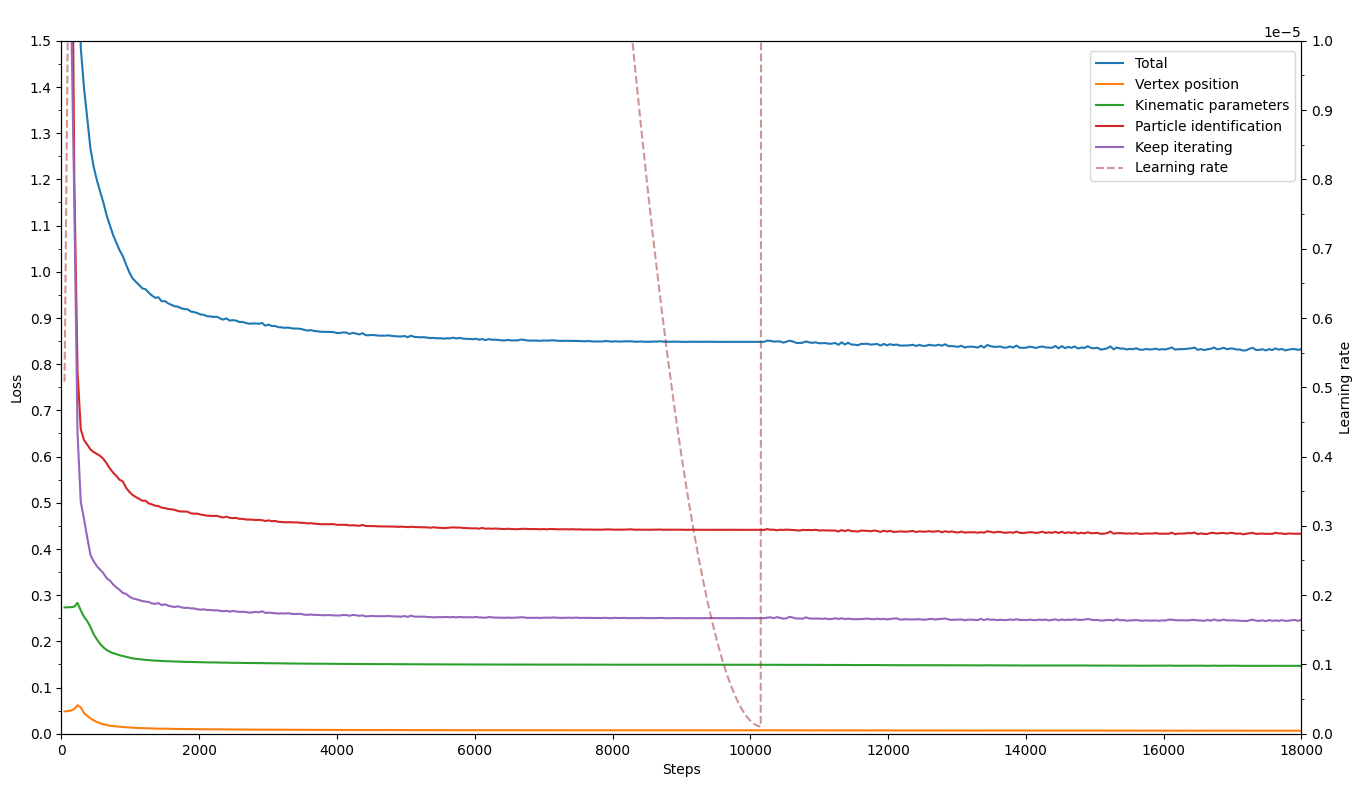

In [4]:
fig, ax = plt.subplots(figsize=(16,9))

for k in range(len(loss_names)):
    # ax.scatter(x=metrics["epoch"],y=metrics[loss_names[k]],label=loss_legends[k])
    ax.plot(metrics["step"],metrics[loss_names[k]],label=loss_legends[k],
            # marker='o'
            )

ax2=ax.twinx()
ax2.plot(metrics["step"],metrics["lr"],label="Learning rate", ls="--", color="brown",alpha=0.5)
ax2.set_ylabel("Learning rate")

fig.legend(loc=(0.8,0.77))
ax.set_xlabel("Steps")
ax.set_ylabel("Loss")
ax.set_ylim((0.,2.))
# ax.set_ylim((0.,0.25))
ax.set_ylim((0.,1.5))
ax2.set_ylim((0.,1e-5))
# ax.set_ylim((0.01,1))
# ax.set_yscale("log")
ax.set_yticks(np.linspace(0.,1.5,16))
ax.set_yticks(np.linspace(0.,1.5,31),minor=True)
ax2.set_yticks(np.linspace(0.,1e-5,11))
ax2.set_yticks(np.linspace(0.,1e-5,21),minor=True)

ax.set_xlim((0.,18000))
fig.show();
i = int(np.argmin(metrics["val_loss"]))
print("".join(["Best losses: \n\t"]+[f"{loss_legends[k]+':':<30} {metrics[loss_names[k]][i]:.2e}  \n\t" for k in range(len(loss_names))]))
# print("".join([f"{metrics[loss_names[k]][i]:.2e}\n" for k in range(len(loss_names))]))